# CNC Mill Tool Wear
- https://www.kaggle.com/shasun/tool-wear-detection-in-cnc-mill
- Predict "Machining_Process"

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,7,6,4.0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,7,6,4.0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,7,6,4.0


(25286, 50)


<AxesSubplot:>

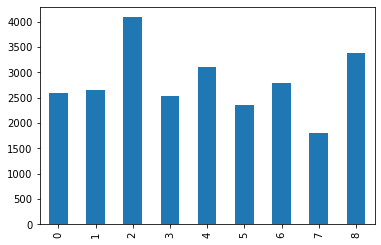

In [14]:
# Read data
df = pd.read_pickle('./data/pred_machining_process.pkl',compression='gzip')

# Read from CSV instead
#df = pd.read_csv('./data/pred_machining_process.csv')

display(df.head(3))
print(df.shape)
df['Machining_Process'].value_counts().sort_index().plot(kind='bar')


(2528, 50)


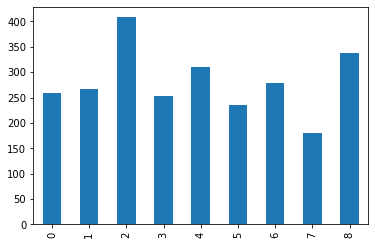

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sample data (for experimenting)
df = df.groupby(by='Machining_Process').sample(frac=0.1, random_state=1)
print(df.shape)
df['Machining_Process'].value_counts().sort_index().plot(kind='bar')

# Extract data
colsX = np.array([item for item in df.columns if item not in 'Machining_Process'])
X = df[colsX].values
y = df['Machining_Process'].values

# Reduce no. of columns of ALL data
X = StandardScaler().fit_transform(X)
X = PCA(n_components=4).fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Voting Classifier

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Bagging Classifier

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Gradient Boosting Classifier

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

# Popular Gradient Boosting Libraries

In [7]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier